In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
#pip install xgboost

In [3]:
#pip install catboost

In [3]:
df=pd.read_csv("data/insurance_clean.csv")

In [4]:
df

,age,gender,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1332,50,male,31.0,3,no,northwest,10600.55
1333,18,female,31.9,0,no,northeast,2205.98
1334,18,female,36.9,0,no,southeast,1629.83
1335,21,female,25.8,0,no,southwest,2007.95


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])


In [10]:
#df.drop(columns='Unnamed: 0',axis=1, inplace=True)

In [6]:
df

,age,gender,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1332,50,1,31.0,3,0,1,10600.55
1333,18,0,31.9,0,0,0,2205.98
1334,18,0,36.9,0,0,2,1629.83
1335,21,0,25.8,0,0,3,2007.95


#### Preparing X and Y variables

In [7]:
X = df.drop(columns=['expenses'],axis=1)

In [8]:
y= df.expenses

In [9]:
X.shape

(1337, 6)

In [10]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1069, 6), (268, 6))

#### Create an Evaluate Function to give all metrics after model Training

In [11]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6082.9083
- Mean Absolute Error: 4181.1718
- R2 Score: 0.7297
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5957.8958
- Mean Absolute Error: 4182.5973
- R2 Score: 0.8068


Lasso
Model performance for Training set
- Root Mean Squared Error: 6082.9094
- Mean Absolute Error: 4181.5119
- R2 Score: 0.7297
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5958.6761
- Mean Absolute Error: 4183.2965
- R2 Score: 0.8068


Ridge
Model performance for Training set
- Root Mean Squared Error: 6083.1465
- Mean Absolute Error: 4190.0047
- R2 Score: 0.7297
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5972.4804
- Mean Absolute Error: 4198.4488
- R2 Score: 0.8059


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 9005.0156
- Mean Absolute Error: 6126.8083


#### Results

In [13]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.887771
5,Random Forest Regressor,0.882794
8,AdaBoost Regressor,0.858447
6,XGBRegressor,0.858134
0,Linear Regression,0.806828
1,Lasso,0.806777
2,Ridge,0.805881
4,Decision Tree,0.765704
3,K-Neighbors Regressor,0.043586


In [14]:
cat_model = CatBoostRegressor()
cat_model = cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)


Learning rate set to 0.041377
0:	learn: 11367.1542762	total: 1.91ms	remaining: 1.91s
1:	learn: 11042.6979440	total: 4.1ms	remaining: 2.04s
2:	learn: 10727.9103207	total: 4.93ms	remaining: 1.64s
3:	learn: 10429.3195225	total: 6.32ms	remaining: 1.57s
4:	learn: 10132.0068523	total: 7.54ms	remaining: 1.5s
5:	learn: 9847.7251860	total: 8.7ms	remaining: 1.44s
6:	learn: 9584.8285171	total: 9.92ms	remaining: 1.41s
7:	learn: 9324.4428552	total: 11.3ms	remaining: 1.4s
8:	learn: 9090.0738972	total: 12.5ms	remaining: 1.38s
9:	learn: 8872.0925018	total: 14.7ms	remaining: 1.46s
10:	learn: 8666.6650458	total: 15.5ms	remaining: 1.39s
11:	learn: 8451.4036157	total: 17.6ms	remaining: 1.45s
12:	learn: 8256.1323967	total: 19.1ms	remaining: 1.45s
13:	learn: 8066.8084323	total: 19.7ms	remaining: 1.39s
14:	learn: 7878.5167343	total: 20.9ms	remaining: 1.37s
15:	learn: 7700.3814927	total: 22.2ms	remaining: 1.36s
16:	learn: 7516.5227549	total: 23.8ms	remaining: 1.38s
17:	learn: 7350.0265947	total: 25.6ms	remain

## Plot y_pred and y_test

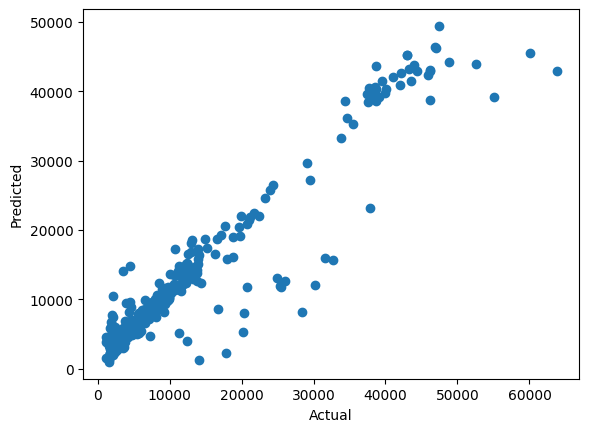

In [15]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

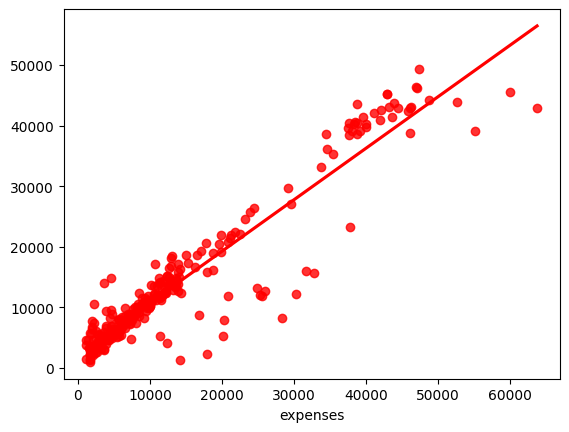

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [17]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
899,8688.86,10445.345064,-1756.485064
1063,5708.87,8005.753125,-2296.883125
1255,11436.74,14223.206894,-2786.466894
298,38746.36,38627.870722,118.489278
237,4463.21,5613.228862,-1150.018862
...,...,...,...
534,13831.12,12675.910626,1155.209374
542,13887.20,15811.097029,-1923.897029
759,3925.76,9493.989543,-5568.229543
1283,47403.88,49392.101563,-1988.221563
